In [1]:
import pandas as pd  # Importing pandas library to handle data
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical data

# Step 1: Load the dataset
df = pd.read_csv("Breast_cancer_dataset.csv")  # Read the dataset from a CSV file into a pandas DataFrame

# Step 2: Remove unnecessary 'id' and 'Unnamed: 32' columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])  # Drop the 'id' and 'Unnamed: 32' columns from the DataFrame

# Step 3: Encode the target variable 'diagnosis' (M = 1, B = 0)
label_encoder = LabelEncoder()  # Initialize LabelEncoder to convert categorical labels into numerical labels
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])  # Convert 'diagnosis' column from categorical to numerical (M = 1, B = 0)

# Output: Check the first few rows of cleaned data
print("First 5 rows of cleaned data:\n", df_cleaned.head())  # Display the first 5 rows of the cleaned dataset


First 5 rows of cleaned data:
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.24

In [7]:

import numpy as np  # Ensure NumPy is imported
from sklearn.model_selection import train_test_split  # Import the function to split data into train and test sets

#  Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['diagnosis'])  # Drop the target column 'diagnosis' to get the features (X)
y = df_cleaned['diagnosis']  # 'diagnosis' is the target variable (y)

#  Convert all features in X to numeric (coerce non-numeric to NaN)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns in X to numeric, non-numeric values become NaN

#  Handle NaN values by filling them with column means
X = X.fillna(X.mean())  # Replace NaN values in X with the mean value of the respective column

#  Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and testing sets (80% train, 20% test)

# Ensure all features in X_train and X_test are numeric (float64)
X_train = np.array(X_train, dtype=np.float64)  # Convert training features to numpy array of type float64
X_test = np.array(X_test, dtype=np.float64)  # Convert testing features to numpy array of type float64

# Output: Check data types and shapes
print("Data types of X_train:\n", X_train.dtype)  # Print data type of X_train
print("Data types of X_test:\n", X_test.dtype)  # Print data type of X_test
print("Shape of X_train:", X_train.shape)  # Print the shape of X_train (rows, columns)
print("Shape of X_test:", X_test.shape)  # Print the shape of X_test (rows, columns)


Data types of X_train:
 float64
Data types of X_test:
 float64
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)


In [9]:

class NaiveBayes:  # Define the NaiveBayes class
    def fit(self, X, y):  # 'fit' method: trains the model using training data (X) and labels (y)
        n_samples, n_features = X.shape  # Get the number of samples and features in the dataset
        self._classes = np.unique(y)  # Identify unique classes in the target variable (y)
        n_classes = len(self._classes)  # Number of unique classes

        # Initialize mean, var, and prior arrays for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)  # Mean of each feature per class
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  # Variance of each feature per class
        self._priors = np.zeros(n_classes, dtype=np.float64)  # Prior probability of each class

        # For each class, calculate the mean, variance, and prior probability
        for idx, c in enumerate(self._classes):  # Loop through each class
            X_c = X[y == c]  # Select the samples belonging to class 'c'
            self._mean[idx, :] = X_c.mean(axis=0)  # Calculate mean of each feature for class 'c'
            self._var[idx, :] = X_c.var(axis=0)  # Calculate variance of each feature for class 'c'
            self._priors[idx] = X_c.shape[0] / float(n_samples)  # Calculate prior probability of class 'c'

    def predict(self, X):  # 'predict' method: makes predictions on the given input data (X)
        y_pred = [self._predict(x) for x in X]  # Predict the class for each sample in X
        return np.array(y_pred)  # Return the predictions as a NumPy array

    def _predict(self, x):  # '_predict' method: predicts the class for a single sample (x)
        posteriors = []  # List to store the posterior probability for each class
        for idx, c in enumerate(self._classes):  # Loop through each class
            prior = np.log(self._priors[idx])  # Log-prior to avoid numerical underflow
            posterior = np.sum(np.log(self._pdf(idx, x)))  # Log of PDF for each feature
            posterior = posterior + prior  # Add prior to posterior
            posteriors.append(posterior)  # Append the posterior to the list
        return self._classes[np.argmax(posteriors)]  # Return the class with the highest posterior probability

    def _pdf(self, class_idx, x):  # '_pdf' method: calculates the probability density function (PDF) for a class
        mean = self._mean[class_idx]  # Mean of the features for the class
        var = self._var[class_idx]  # Variance of the features for the class
        # Gaussian PDF formula for each feature (assuming Gaussian distribution)
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))  # Exponential part of the Gaussian formula
        denominator = np.sqrt(2 * np.pi * var)  # Normalizing factor (standard deviation)
        return numerator / denominator  # Return the PDF for the features


Custom Naive Bayes model accuracy: 96.49%


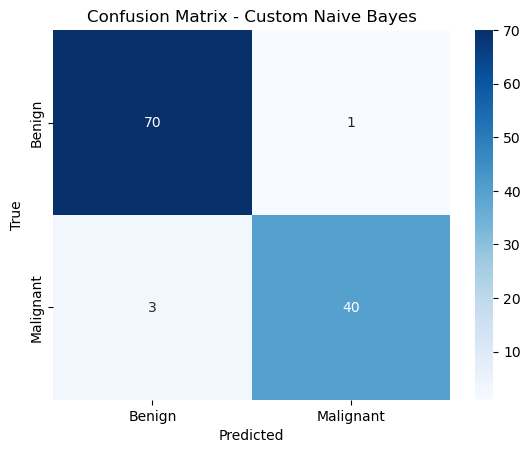

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix  # Import functions for evaluation
#import seaborn as sns  # Import Seaborn for creating visualizations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs

# Reinitialize and fit the custom Naive Bayes model
nb_custom = NaiveBayes()  # Create an instance of the NaiveBayes class
nb_custom.fit(X_train, y_train)  # Fit the model to the training data (X_train and y_train)

# Step 1: Make predictions using the custom Naive Bayes model
y_pred_custom = nb_custom.predict(X_test)  # Use the trained model to predict the labels for X_test

# Step 2: Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)  # Compare the predicted labels (y_pred_custom) with actual labels (y_test) and compute accuracy

# Step 3: Display accuracy
print(f"Custom Naive Bayes model accuracy: {accuracy_custom * 100:.2f}%")  # Print the accuracy as a percentage

# Step 4: Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)  # Calculate the confusion matrix comparing actual vs predicted labels

# Step 5: Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # Create a heatmap of the confusion matrix
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  # Label the axes
plt.xlabel('Predicted')  # Set label for the x-axis (predicted labels)
plt.ylabel('True')  # Set label for the y-axis (true labels)
plt.title('Confusion Matrix - Custom Naive Bayes')  # Set the title of the plot
plt.show()  # Display the plot
